In [25]:
import pandas as pd
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [15]:
df_train = pd.read_csv('../Working_Notebook/training_data2.csv')
df_test = pd.read_csv('../Working_Notebook/testing_data2.csv')
df_train.head()

Unnamed: 0 state  account length international plan voice mail plan  \
0         228    VA             104                 no             yes   
1         367    MD              45                 no              no   
2         872    OK             149                 no             yes   
3        1266    IA              42                 no              no   
4         277    SD             144                 no             yes   

   number vmail messages  total day minutes  total day calls  \
0                     23              280.2              136   
1                      0               78.2              127   
2                     43              206.7               79   
3                      0              155.4              127   
4                     48              189.8               96   

   total day charge  total eve minutes  ...  customer service calls  \
0             47.63              220.5  ...                       4   
1             13.29              253.4  ...                       1   
2             35.14              174.6  ...                       1   
3             26.42              164.1  ...                       0   
4             32.27              123.4  ...                       2   

   average_hourly_night_rate  average_hourly_day_rate  \
0                  22.224026                 5.882847   
1                  22.212544                 5.884123   
2                  22.217111                 5.882186   
3                  22.211268                 5.881908   
4                  22.219917                 5.881624   

   average_hourly_intl_rate  average_hourly_eve_rate  total_minutes  state.1  \
0                  3.704735                11.766275          650.9       VA   
1                  3.703704                11.764160          604.6       MD   
2                  3.707483                11.765499          633.7       OK   
3                  3.703704                11.763441          486.2       IA   
4                  3.693182                11.763584          533.9       SD   

   international plan.1  voice mail plan.1  churn  
0                    no                yes  False  
1                    no                 no  False  
2                    no                yes  False  
3                    no                 no  False  
4                    no                yes   True  

[5 rows x 28 columns]

In [16]:
X_train = df_train.drop(['Unnamed: 0','churn', 'state.1', 'international plan.1', 'voice mail plan.1'], axis=1)
y_train = df_train['churn']
X_test = df_test.drop(['Unnamed: 0','churn', 'state.1', 'international plan.1', 'voice mail plan.1'], axis=1)
y_test = df_test['churn']

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      2484 non-null   object 
 1   account length             2484 non-null   int64  
 2   international plan         2484 non-null   object 
 3   voice mail plan            2484 non-null   object 
 4   number vmail messages      2484 non-null   int64  
 5   total day minutes          2484 non-null   float64
 6   total day calls            2484 non-null   int64  
 7   total day charge           2484 non-null   float64
 8   total eve minutes          2484 non-null   float64
 9   total eve calls            2484 non-null   int64  
 10  total eve charge           2484 non-null   float64
 11  total night minutes        2484 non-null   float64
 12  total night calls          2484 non-null   int64  
 13  total night charge         2484 non-null   float

## Dummy Model

In [4]:
dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train, y_train)
np.mean(cross_val_score(estimator=dummy, X=X_train, y=y_train, cv=5))


0.8518522424871812

In [5]:
y_pred = dummy.predict(X_train)
y_pred

array([False, False, False, ..., False, False, False])

In [6]:
acc = accuracy_score(y_train, y_pred)
prec = precision_score(y_train, y_pred)
rec = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
print(f'accuracy score is {acc}')
print(f'precision score is {prec}')
print(f'recall score is {rec}')
print(f'F1 score is {f1}')

accuracy score is 0.8518518518518519
precision score is 0.0
recall score is 0.0
F1 score is 0.0


C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


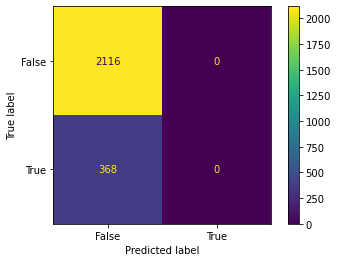

In [7]:
plot_confusion_matrix(estimator=dummy, X=X_train, y_true=y_train);

## Subpipeline

In [8]:
subpipe_num = ImPipeline(steps=[('ss', StandardScaler())])
subpipe_state = ImPipeline(steps=[('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])
subpipe_plan = ImPipeline(steps=[('ord_ohe', OrdinalEncoder())])

In [9]:
X_train

state  account length international plan voice mail plan  \
0       VA             104                 no             yes   
1       MD              45                 no              no   
2       OK             149                 no             yes   
3       IA              42                 no              no   
4       SD             144                 no             yes   
...    ...             ...                ...             ...   
2479    KS              52                 no              no   
2480    MA              46                 no              no   
2481    WA             171                 no              no   
2482    MD              52                 no              no   
2483    IA              88                 no              no   

      number vmail messages  total day minutes  total day calls  \
0                        23              280.2              136   
1                         0               78.2              127   
2                        43              206.7               79   
3                         0              155.4              127   
4                        48              189.8               96   
...                     ...                ...              ...   
2479                      0              165.5               78   
2480                      0              139.4               81   
2481                      0              270.5               69   
2482                      0              209.8              114   
2483                      0              113.7               67   

      total day charge  total eve minutes  total eve calls  ...  \
0                47.63              220.5               92  ...   
1                13.29              253.4              108  ...   
2                35.14              174.6              122  ...   
3                26.42              164.1               45  ...   
4                32.27              123.4               67  ...   
...                ...                ...              ...  ...   
2479             28.14              205.5               89  ...   
2480             23.70              223.7              113  ...   
2481             45.99              230.0              112  ...   
2482             35.67              171.3               82  ...   
2483             19.33              165.1              127  ...   

      total intl charge  customer service calls  average_hourly_night_rate  \
0                  3.59                       4                  22.224026   
1                  4.86                       1                  22.212544   
2                  2.94                       1                  22.217111   
3                  2.43                       0                  22.211268   
4                  1.76                       2                  22.219917   
...                 ...                     ...                        ...   
2479               3.29                       0                  22.226847   
2480               3.67                       1                  22.220796   
2481               2.59                       1                  22.222222   
2482               2.67                       4                  22.212644   
2483               2.92                       1                  22.213501   

      average_hourly_day_rate  average_hourly_intl_rate  \
0                    5.882847                  3.704735   
1                    5.884123                  3.703704   
2                    5.882186                  3.707483   
3                    5.881908                  3.703704   
4                    5.881624                  3.693182   
...                       ...                       ...   
2479                 5.881308                  3.708207   
2480                 5.881857                  3.705722   
2481                 5.881713                  3.706564   
2482                 5.881693                  3.707865   
2483                 5.88204

In [10]:
X_train.select_dtypes(include=['float64', 'int64'])

account length  number vmail messages  total day minutes  \
0                104                     23              280.2   
1                 45                      0               78.2   
2                149                     43              206.7   
3                 42                      0              155.4   
4                144                     48              189.8   
...              ...                    ...                ...   
2479              52                      0              165.5   
2480              46                      0              139.4   
2481             171                      0              270.5   
2482              52                      0              209.8   
2483              88                      0              113.7   

      total day calls  total day charge  total eve minutes  total eve calls  \
0                 136             47.63              220.5               92   
1                 127             13.29              253.4              108   
2                  79             35.14              174.6              122   
3                 127             26.42              164.1               45   
4                  96             32.27              123.4               67   
...               ...               ...                ...              ...   
2479               78             28.14              205.5               89   
2480               81             23.70              223.7              113   
2481               69             45.99              230.0              112   
2482              114             35.67              171.3               82   
2483               67             19.33              165.1              127   

      total eve charge  total night minutes  total night calls  \
0                18.74                136.9                102   
1                21.54                255.0                100   
2                14.84                241.5                 80   
3                13.95                157.7                128   
4                10.49                214.2                106   
...                ...                  ...                ...   
2479             17.47                213.6                124   
2480             19.01                173.1                 77   
2481             19.55                136.0                111   
2482             14.56                154.6                119   
2483             14.03                141.5                142   

      total night charge  total intl minutes  total intl calls  \
0                   6.16                13.3                 3   
1                  11.48                18.0                 3   
2                  10.87                10.9                 3   
3                   7.10                 9.0                 3   
4                   9.64                 6.5                 2   
...                  ...                 ...               ...   
2479                9.61                12.2                 6   
2480                7.79                13.6                 6   
2481                6.12                 9.6                 5   
2482                6.96                 9.9                 9   
2483                6.37                10.8                 3   

      total intl charge  customer service calls  average_hourly_night_rate  \
0                  3.59                       4                  22.224026   
1                  4.86                       1                  22.212544   
2                  2.94                       1                  22.217111   
3                  2.43                       0                  22.211268   
4                  1.76                       2                  22.219917   
...                 ...                     ...                        ...   
2479               3.29                       0                  22.226847   
2480               3.67                       1       

In [18]:
X_train

state  account length international plan voice mail plan  \
0       VA             104                 no             yes   
1       MD              45                 no              no   
2       OK             149                 no             yes   
3       IA              42                 no              no   
4       SD             144                 no             yes   
...    ...             ...                ...             ...   
2479    KS              52                 no              no   
2480    MA              46                 no              no   
2481    WA             171                 no              no   
2482    MD              52                 no              no   
2483    IA              88                 no              no   

      number vmail messages  total day minutes  total day calls  \
0                        23              280.2              136   
1                         0               78.2              127   
2                        43              206.7               79   
3                         0              155.4              127   
4                        48              189.8               96   
...                     ...                ...              ...   
2479                      0              165.5               78   
2480                      0              139.4               81   
2481                      0              270.5               69   
2482                      0              209.8              114   
2483                      0              113.7               67   

      total day charge  total eve minutes  total eve calls  ...  \
0                47.63              220.5               92  ...   
1                13.29              253.4              108  ...   
2                35.14              174.6              122  ...   
3                26.42              164.1               45  ...   
4                32.27              123.4               67  ...   
...                ...                ...              ...  ...   
2479             28.14              205.5               89  ...   
2480             23.70              223.7              113  ...   
2481             45.99              230.0              112  ...   
2482             35.67              171.3               82  ...   
2483             19.33              165.1              127  ...   

      total night charge  total intl minutes  total intl calls  \
0                   6.16                13.3                 3   
1                  11.48                18.0                 3   
2                  10.87                10.9                 3   
3                   7.10                 9.0                 3   
4                   9.64                 6.5                 2   
...                  ...                 ...               ...   
2479                9.61                12.2                 6   
2480                7.79                13.6                 6   
2481                6.12                 9.6                 5   
2482                6.96                 9.9                 9   
2483                6.37                10.8                 3   

      total intl charge  customer service calls  average_hourly_night_rate  \
0                  3.59                       4                  22.224026   
1                  4.86                       1                  22.212544   
2                  2.94                       1                  22.217111   
3                  2.43                       0                  22.211268   
4                  1.76                       2                  22.219917   
...                 ...                     ...                        ...   
2479               3.29                       0                  22.226847   
2480               3.67                       1                  22.220796   
2481               2.59                       1                  22.222222   
2482               2.67                  

In [22]:
CT = ColumnTransformer(transformers=[
                                        ('subpipe_num', subpipe_num, [X_train.select_dtypes(include=['float64', 'int64'])]), 
                                         ('subpipe_state', subpipe_state,[0]),
                                        ('subpipe_plan', subpipe_plan,[2,3]),
                                    ],
                        remainder='drop'
                                     ) 

In [29]:
sm = SMOTE(sampling_strategy='auto',random_state=42)

In [31]:
logreg_model_pipe = Pipeline(steps=[('ct', CT),
                                    ('logreg', LogisticRegression(random_state=42))])

In [35]:
y_train

0       False
1       False
2       False
3       False
4        True
        ...  
2479    False
2480    False
2481     True
2482    False
2483    False
Name: churn, Length: 2484, dtype: bool

In [34]:
X_train

state  account length international plan voice mail plan  \
0       VA             104                 no             yes   
1       MD              45                 no              no   
2       OK             149                 no             yes   
3       IA              42                 no              no   
4       SD             144                 no             yes   
...    ...             ...                ...             ...   
2479    KS              52                 no              no   
2480    MA              46                 no              no   
2481    WA             171                 no              no   
2482    MD              52                 no              no   
2483    IA              88                 no              no   

      number vmail messages  total day minutes  total day calls  \
0                        23              280.2              136   
1                         0               78.2              127   
2                        43              206.7               79   
3                         0              155.4              127   
4                        48              189.8               96   
...                     ...                ...              ...   
2479                      0              165.5               78   
2480                      0              139.4               81   
2481                      0              270.5               69   
2482                      0              209.8              114   
2483                      0              113.7               67   

      total day charge  total eve minutes  total eve calls  ...  \
0                47.63              220.5               92  ...   
1                13.29              253.4              108  ...   
2                35.14              174.6              122  ...   
3                26.42              164.1               45  ...   
4                32.27              123.4               67  ...   
...                ...                ...              ...  ...   
2479             28.14              205.5               89  ...   
2480             23.70              223.7              113  ...   
2481             45.99              230.0              112  ...   
2482             35.67              171.3               82  ...   
2483             19.33              165.1              127  ...   

      total night charge  total intl minutes  total intl calls  \
0                   6.16                13.3                 3   
1                  11.48                18.0                 3   
2                  10.87                10.9                 3   
3                   7.10                 9.0                 3   
4                   9.64                 6.5                 2   
...                  ...                 ...               ...   
2479                9.61                12.2                 6   
2480                7.79                13.6                 6   
2481                6.12                 9.6                 5   
2482                6.96                 9.9                 9   
2483                6.37                10.8                 3   

      total intl charge  customer service calls  average_hourly_night_rate  \
0                  3.59                       4                  22.224026   
1                  4.86                       1                  22.212544   
2                  2.94                       1                  22.217111   
3                  2.43                       0                  22.211268   
4                  1.76                       2                  22.219917   
...                 ...                     ...                        ...   
2479               3.29                       0                  22.226847   
2480               3.67                       1                  22.220796   
2481               2.59                       1                  22.222222   
2482               2.67                  

In [33]:
logreg_model_pipe.fit(X_train, y_train)

TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed